In [4]:
import pandas as pd
from glob import glob as g
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.weight'] = "bold"
plt.rcParams['legend.framealpha'] = 0

def e(x):
    return enumerate(x)


In [10]:
colum = g('../../data/SF/columbia_1*')
for x in sorted(colum):
    print(x)

../../data/SF/columbia_12436500.txt
../../data/SF/columbia_12462600.txt
../../data/SF/columbia_12472800.txt
../../data/SF/columbia_14211720.txt
../../data/SF/columbia_14246900.txt


In [37]:

for idx,i in e(colum):
    y = []
    with open(i) as f:
        for x in f:
            y.append(x.strip())
    # for xdx,x in enumerate(y):
    #     print(xdx,x)

    z = y[37:253]
    a = []
    for x in z:
        a.append(x.split('\t')[4:])

    if idx == 0:
        b = a.copy()
        b = np.asarray(b)
        
    else:
        a = np.asarray(a)
        c = np.expand_dims(a[:,2],1)
        b = np.hstack((b,c))


c = pd.DataFrame(b,columns=['year',
                            'month',
                            f'{colum[0][23:-4]}',
                            f'{colum[1][23:-4]}',
                            f'{colum[2][23:-4]}',
                            f'{colum[3][23:-4]}',
                            f'{colum[4][23:-4]}'
                           ]
                )
c

,year,month,12436500,12462600,12472800,14211720,14246900
0,2002,1,90890,97990,101000,75230,260700
1,2002,2,92850,99710,100900,46250,221500
2,2002,3,65520,72570,73610,45970,201800
3,2002,4,106700,116900,122700,44300,287000
4,2002,5,119000,141900,144000,24100,271900
...,...,...,...,...,...,...,...
211,2019,8,94250,95980,95980,6074,132300
212,2019,9,53190,54860,55290,8116,102800
213,2019,10,53770,59130,59450,10420,114400
214,2019,11,90930,95870,96820,8717,139900


In [38]:
q = g('../../data/SF/*08*')

for i in q:
    print(i)
    print(i[23:-4])

../../data/SF/columbia_08NE049.txt
08NE049
../../data/SF/columbia_08NE087.txt
08NE087


In [39]:

for idx,i in e(q):
    p = []
    with open(i) as f:
        if idx == 0:
            print('discharge in cubic meters per sec \n')
            for x in f:
                y = x.strip().split('\t')

                p.append((y[0],y[1],y[4]))
        else:
            for x in f:
                y = x.strip().split('\t')
                p.append((y[0],y[1],y[4]))
    # print(len(p))
    for jdj,j in e(p):
        _
        # print(jdj,j)
    o = np.asarray(p[24:240])
    # print(o.shape)
    for oxo,x in e(o):
        _
        # print(oxo,x)


    c[f'{str(i[23:-4])}'] = np.int64(np.float32(o[:,2]) * 35.3147)
c

discharge in cubic meters per sec 



,year,month,12436500,12462600,12472800,14211720,14246900,08NE049,08NE087
0,2002,1,90890,97990,101000,75230,260700,50853,5
1,2002,2,92850,99710,100900,46250,221500,46262,4
2,2002,3,65520,72570,73610,45970,201800,42377,3
3,2002,4,106700,116900,122700,44300,287000,37786,24
4,2002,5,119000,141900,144000,24100,271900,60741,110
...,...,...,...,...,...,...,...,...,...
211,2019,8,94250,95980,95980,6074,132300,74514,7
212,2019,9,53190,54860,55290,8116,102800,48734,10
213,2019,10,53770,59130,59450,10420,114400,30158,18
214,2019,11,90930,95870,96820,8717,139900,57916,13


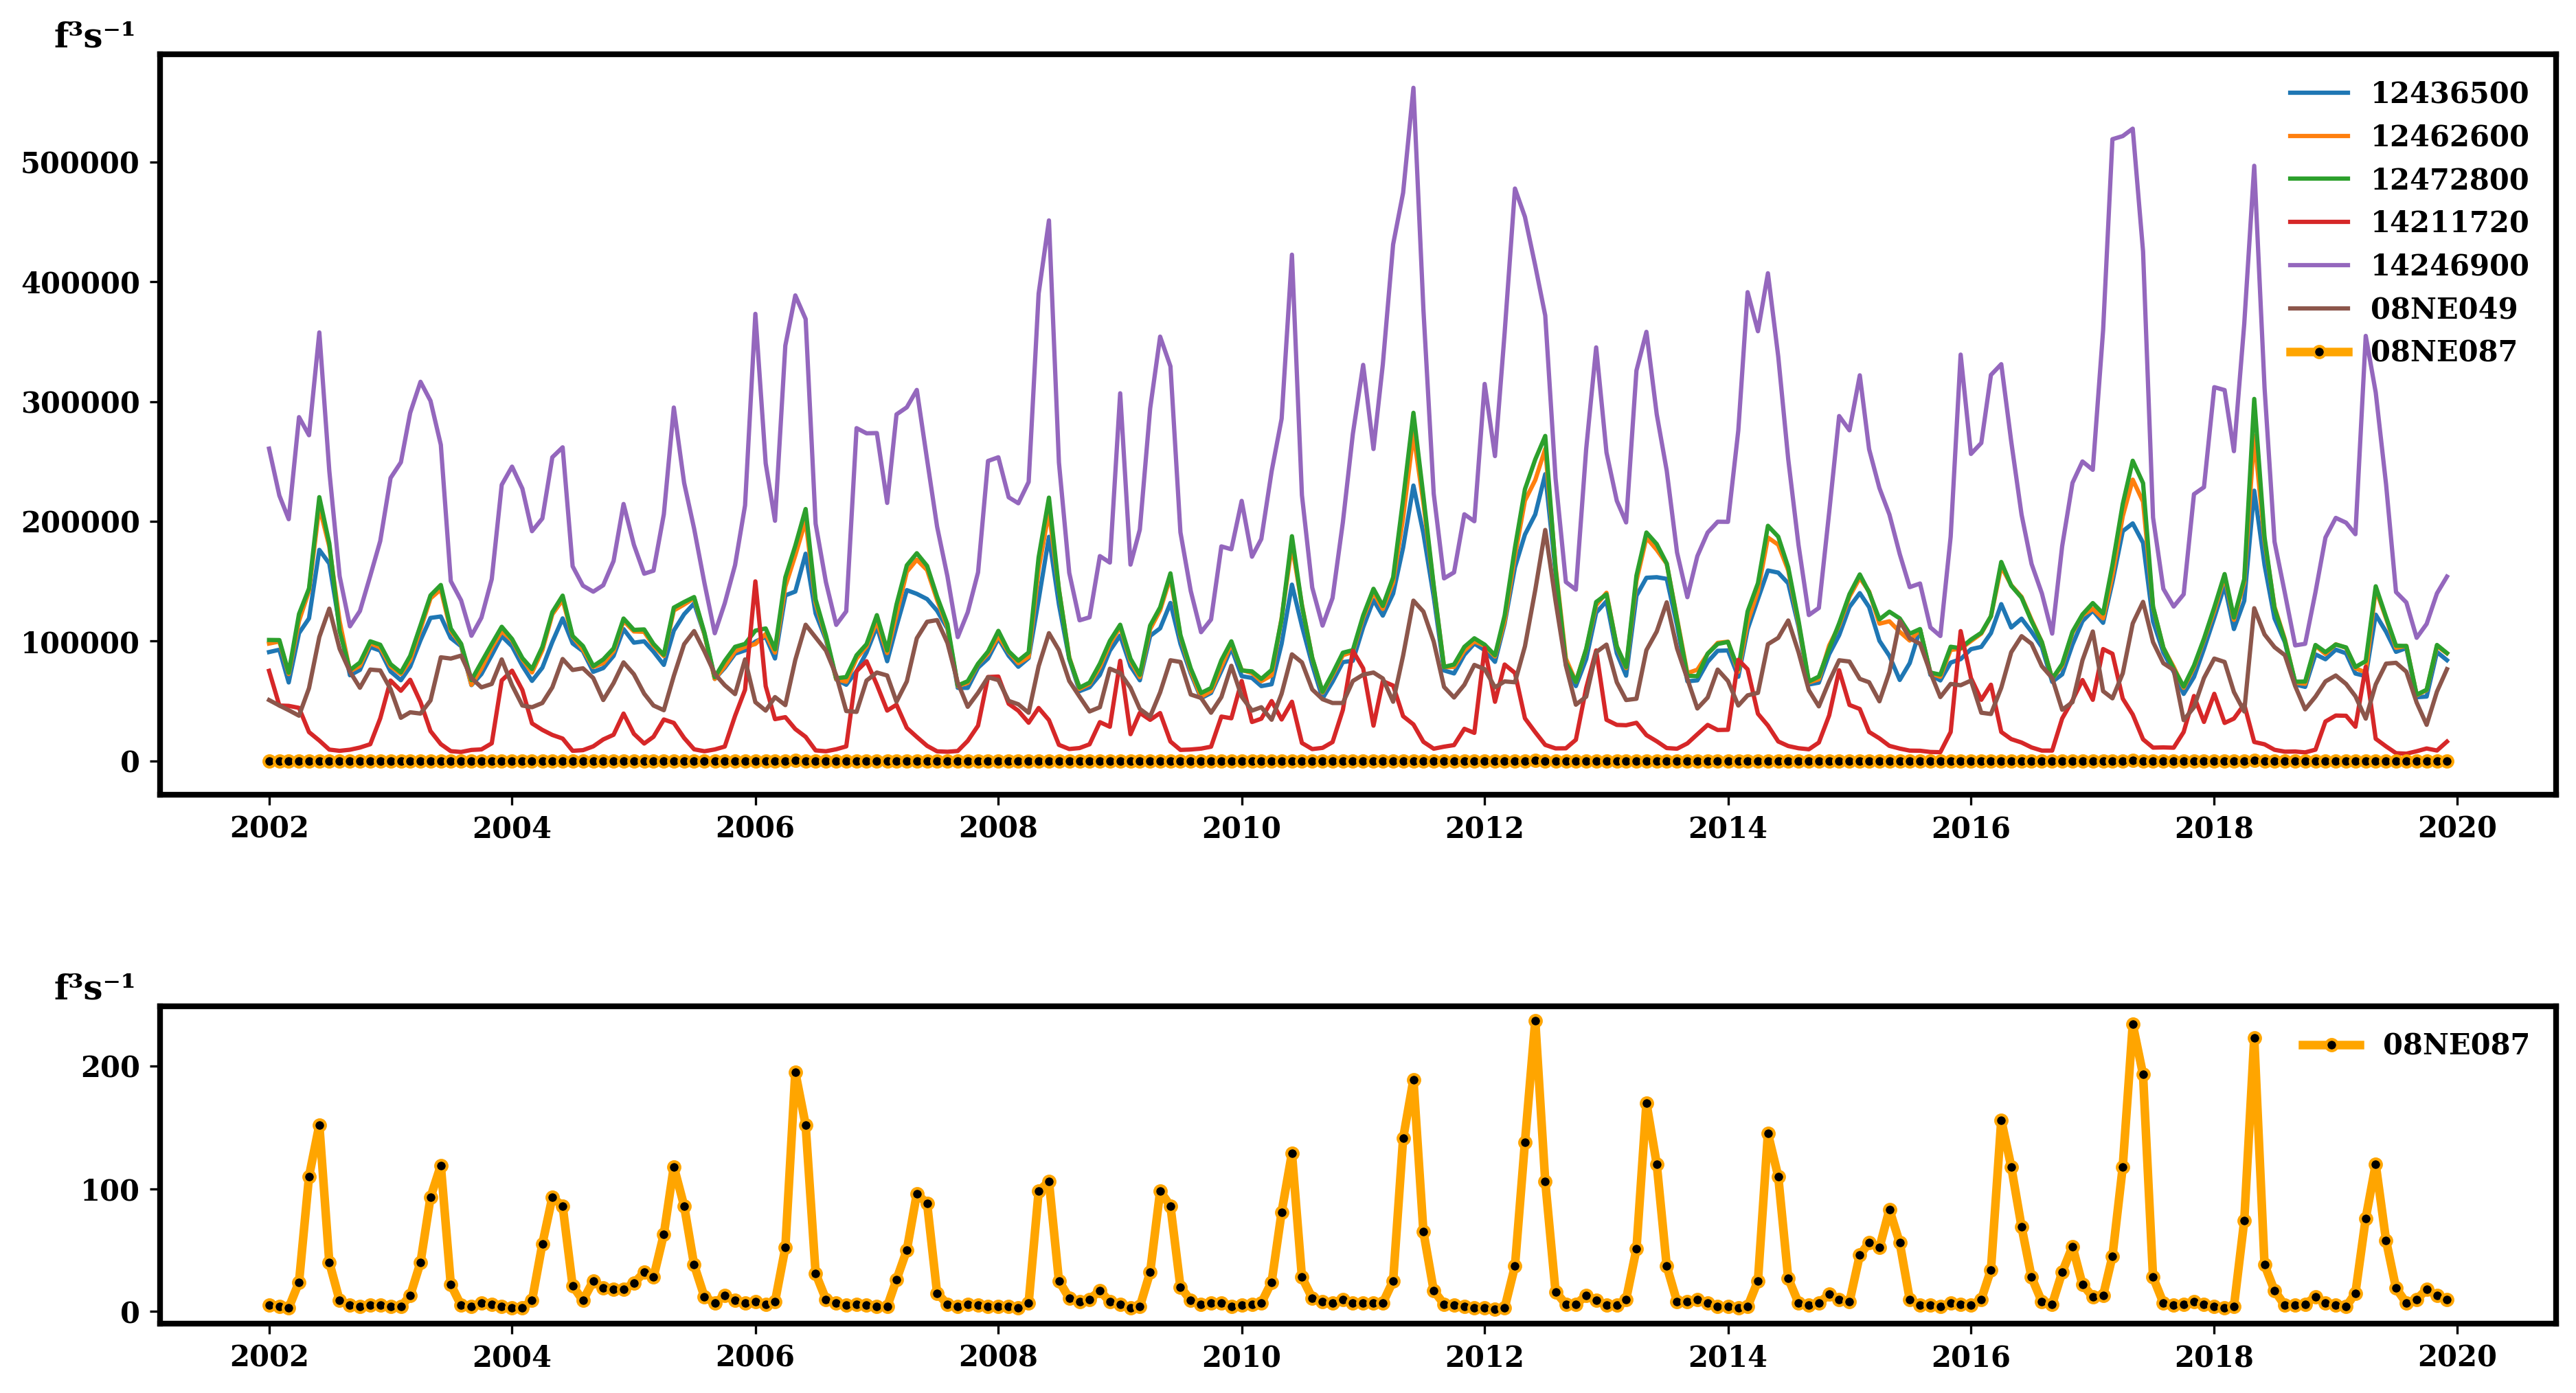

In [44]:
times = np.arange(np.datetime64('2002-01'),
                  np.datetime64('2019-12') + np.timedelta64(1, 'M'), np.timedelta64(1, 'M'))

fig = plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(nrows=2,ncols=1,hspace=.4,width_ratios=[1],height_ratios=[.7,.3])

fig.add_subplot(gs[0,0])

for i in range(2,9):
    # plt.title('all columbia streamflow time series measurements used')
    if i == 8:
        plt.plot(times,np.float32(c.iloc[:,i]),color='orange',markerfacecolor='black',markersize=4,marker='o',linewidth=3)
    else:
        plt.plot(times,np.float32(c.iloc[:,i]))
plt.legend(c.columns[2:9])

ax = plt.gca()
plt.ylabel('f³s⁻¹',loc='top',rotation=0,fontweight='bold',fontsize=12)
ax.yaxis.set_label_coords(-0.01,1.0)

fig.add_subplot(gs[1,0])
# plt.title('low flow, zoomed in dataset from panel above')
plt.plot(times,np.float32(c.iloc[:,i]),color='orange',markerfacecolor='black',markersize=4,marker='o',linewidth=3)
plt.legend([c.columns[8]])

ax = plt.gca()
plt.ylabel('f³s⁻¹',loc='top',rotation=0,fontweight='bold',fontsize=12)
ax.yaxis.set_label_coords(-0.01,1.0)

plt.savefig('../../data/colum_sf.png',bbox_inches='tight')